In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('D:\\MasterBigData\\Didattica\\DMML\\Project\\training_ready.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IsBadBuy         72983 non-null  int64  
 1   Auction          72983 non-null  int64  
 2   VehicleAge       72983 non-null  int64  
 3   WheelType        72983 non-null  object 
 4   VehOdo           72983 non-null  int64  
 5   Nationality      72983 non-null  object 
 6   VehBCost         72983 non-null  float64
 7   WarrantyCost     72983 non-null  int64  
 8   OutCost          72983 non-null  int64  
 9   VehOdo_Standard  72983 non-null  float64
 10  AverageMMR       72983 non-null  float64
 11  Make_new         72983 non-null  object 
 12  VNST_new         72983 non-null  object 
 13  Size_class       72983 non-null  int64  
 14  Model_Name       72983 non-null  object 
 15  Model_Property   72983 non-null  object 
 16  SubModel_New     72983 non-null  object 
 17  Trim_New    

# K-Mode

Per le variabili categoriche che presentano molte modalità, creiamo dei cluster che possano riassumere l'informazione.

In [4]:
from kmodes.kmodes import KModes
from scipy.stats import hmean
from scipy.stats import entropy
import math

In [5]:
def ClusterEntropy(df, attributes, km, Cluster='Cluster'):
    df[Cluster] = km.labels_
    E_list = []
    w_list = []
    for i in range(len(km.cluster_centroids_)):
        E = 0
        ent_list = []
        den = len(df[df[Cluster] == i])
        for j in range(len(attributes)):
            num = df[attributes[j]][df[Cluster] == i][df[attributes[j]] == km.cluster_centroids_[i][j]].count()         
            pk = [num/den, 1-num/den]
            e = entropy(pk, base=len(df[attributes[j]].unique()))
            ent_list.append(e)
            E = np.mean(ent_list)       
        E_list.append(E)
        w_list.append(den)
    return np.mean(E_list), np.average(E_list, weights=w_list)

In [6]:
X = train[['Make_new', 'Model_Name', 'Model_Property', 'Trim_New', 'SubModel_New', 'Nationality']].values

Wall time: 59min 16s


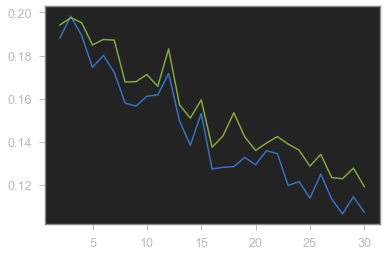

In [7]:
%%time
temp = train
attributes = ['Make_new', 'Model_Name', 'Model_Property', 'Trim_New', 'SubModel_New', 'Nationality']
entropy_list = list()
WEntropy_list = list()
max_k = 30
for k in range(2, max_k + 1):
    cluster = 'Clustering_'+str(k)
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0, random_state=1)
    km.fit_predict(X)
    
    cluster_function = ClusterEntropy(temp, attributes, km, Cluster=cluster)
    entropy_list.append(cluster_function[0])
    WEntropy_list.append(cluster_function[1])

plt.plot(range(2,max_k + 1), entropy_list)
plt.plot(range(2,max_k + 1), WEntropy_list)

In [8]:
print(entropy_list)
print(WEntropy_list)

[0.18816741716916335, 0.19823759064493493, 0.18930454935007174, 0.17449459539405113, 0.18007359851460666, 0.17215929596646465, 0.15796672091239927, 0.15652361947266444, 0.16110176569040152, 0.16173704792903051, 0.17165984642308998, 0.14969150576688237, 0.1383869298500807, 0.1530835725963275, 0.12732731134403924, 0.12813956017032282, 0.12842828789665794, 0.1327049160197715, 0.12932676269934923, 0.1358225460743207, 0.13448976331272763, 0.11970457997879368, 0.12148158980174935, 0.11381164420656084, 0.1249309366863181, 0.11341898411903369, 0.10649497012607638, 0.11449052928230757, 0.1072837406966582]
[0.19419700618961092, 0.19758850927728883, 0.19524906786112461, 0.1849158022964, 0.18747182210789728, 0.1871471743977048, 0.1677132847206614, 0.1679012283329748, 0.17117466624156538, 0.1657032005335746, 0.1830837083937142, 0.15716721967305386, 0.15097181817255645, 0.15947571677839512, 0.13745684446030865, 0.14269315928694631, 0.15348270663501043, 0.14228060923446015, 0.1359460892545488, 0.1393

Clustering da 16

In [9]:
km_16 = KModes(n_clusters=16, init='Huang', n_init=5, verbose=0, random_state=1)
km_16.fit(X)

KModes(cat_dissim=<function matching_dissim at 0x000001E1FBAEDEE8>,
       init='Huang', max_iter=100, n_clusters=16, n_init=5, n_jobs=1,
       random_state=1, verbose=0)

In [10]:
np.unique(km_16.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint16),
 array([13693,  5612,  7836,  5834,  6928,  6930,  2542,  1030,  3722,
         1861,  6048,  4380,  1747,   970,  1449,  2401], dtype=int64))

In [11]:
km_16.cluster_centroids_

array([['FORD', 'TAURUS', 'None', 'SE', 'SEDAN', 'AMERICAN'],
       ['DODGE', 'CARAVAN', 'FWD', 'SE', 'MINIVAN', 'AMERICAN'],
       ['CHEVROLET', 'IMPALA', 'None', 'L', 'SEDAN', 'AMERICAN'],
       ['KIA', 'SPECTRA', 'None', 'EX', 'SEDAN', 'OTHER ASIAN'],
       ['DODGE', 'STRATUS', 'V6', 'Bas', 'SEDAN', 'AMERICAN'],
       ['CHEVROLET', 'TRAILBLAZER', '2WD', 'L', 'SUV', 'AMERICAN'],
       ['NISSAN', 'ALTIMA', 'None', 'Bas', 'SEDAN', 'TOP LINE ASIAN'],
       ['TOYOTA', 'CAMRY', '4C', 'L', 'SEDAN', 'TOP LINE ASIAN'],
       ['PONTIAC', 'GRAND', 'PRIX', 'Bas', 'SEDAN', 'AMERICAN'],
       ['HYUNDAI', 'SONATA', 'None', 'GL', 'SEDAN', 'OTHER ASIAN'],
       ['CHRYSLER', 'PT', 'CRUISER', 'Bas', 'SEDAN', 'AMERICAN'],
       ['CHEVROLET', 'MALIBU', '4C', 'L', 'SEDAN', 'AMERICAN'],
       ['CHEVROLET', 'UPLANDER', 'FWD', 'L', 'PASSENGER', 'AMERICAN'],
       ['CHEVROLET', 'CAVALIER', '4C', 'Bas', 'SEDAN', 'AMERICAN'],
       ['CHEVROLET', 'IMPALA', 'V6', 'L', 'SEDAN', 'AMERICAN'],
       [

In [12]:
train['Label'] = km_16.labels_

In [13]:
pd.crosstab(train['IsBadBuy'], train['Label'])

Label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
IsBadBuy,,,,,,,,,,,,,,,,
0,11800,4959,6977,5062,6101,6020,2161,938,3227,1621,5187,4036,1534,828,1369,2187
1,1893,653,859,772,827,910,381,92,495,240,861,344,213,142,80,214


In [15]:
c = 4
print(train['Trim_New'][train['Label']==c].groupby([train['Label'],train['Trim_New']]).count())
print(train['SubModel_New'][train['Label']==c].groupby([train['Label'],train['SubModel_New']]).count())

Label  Trim_New
4      Bas         2950
       C             11
       ES            29
       GL            60
       GT           264
       Lim           56
       Other        215
       SE           504
       SX          2362
       T            399
       X             78
Name: Trim_New, dtype: int64
Label  SubModel_New
4      CAB               29
       CONVERTIBLE      234
       COUPE            624
       CUV              367
       SEDAN           5401
       SPORT              1
       SUV              135
       WAGON            137
Name: SubModel_New, dtype: int64


I risultati del K Mode non sono soddisfacenti.